## **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

## 3. Interpolation and Blending

 Importing necessary libraries/modules and functions

In [1]:
% matplotlib inline
% pprint off


# Import the library as show images, plot, etc.
import matplotlib.pyplot as plt
# Import functionality for the color map
import matplotlib.cm as cm

# Import system specific parameters and function
import sys 

## Other plotting libraries
# import seaborn as sns

# Import the library to mange the matrix and array 
import numpy as np

# Importing image processing toolbox 
## Module to read, write,... 
from skimage import io
## Module to convert the image on 8 bits
from skimage import img_as_ubyte
## Module to convert the image to float
from skimage import img_as_float
## Module for color conversion 
from skimage import color
## Module image transform from skimage for resize 
from skimage import transform
## Module misc from scipy for resize 
from scipy import misc
## Module util from skimage 
from PIL import Image


Pretty printing has been turned OFF


### 3.1  Resizing an image size using different interpolation functions

** Q.1 Resize the `lena` or `vibot` image using nearest, bilinear and bicubic function.** 

You can define your function which accept the model and resize size from the user or just run a script.

In [5]:
def ImResize (im, method='nearest', size= 0.5):
    print ('The resize method is {}'.format(method))
    img_resize = misc.imresize(im, size, interp = method)
    return img_resize

The resize method is nearest


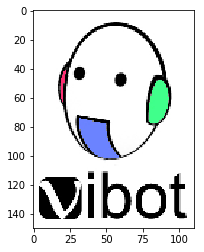

The resize method is bilinear


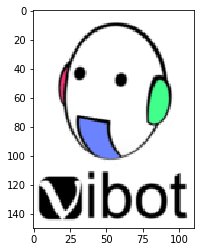

The resize method is bicubic


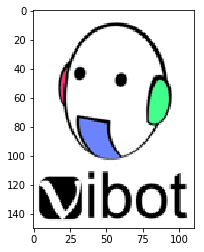

In [8]:
Path = './images/'
vibot_color = 'vibot-color.jpg'
vibot_img = io.imread(Path.__add__(vibot_color))
vibot_img = img_as_float(vibot_img)
methods = ['nearest', 'bilinear', 'bicubic']
for m in methods:
    img_resize = ImResize(vibot_img, m, 0.5)
    plt.figure
    plt.imshow(img_resize, cmap=plt.cm.gray)     
    plt.show()  

**Q.2 Write three functions that performs `simple_blend`, `alpha_blend` and `pyramid_blend`**

** Using your functions, blend `orange` and `apple` images together.**


C:\ProgramData\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Text(0.5,1,'Pyramid Blended Image')

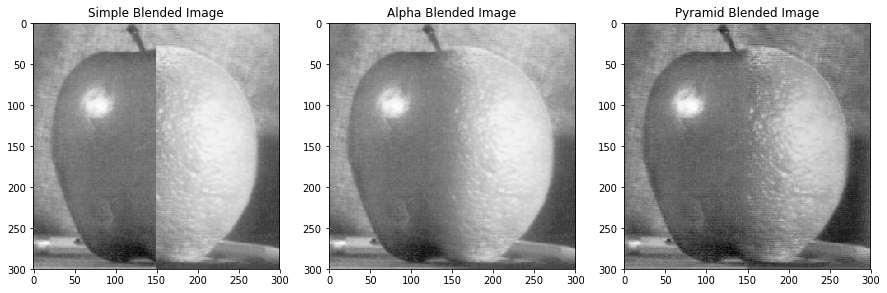

In [14]:
imgpath = './images/'
apple = 'apple.jpeg'
apple_img = io.imread(imgpath.__add__(apple), as_grey=1)
orange = 'orange.jpeg'
orange_img = io.imread(imgpath.__add__(orange), as_grey=1)

def simple_blend(img_1, img_2):
    img1 = np.copy(img_1)
    img2 = np.copy(img_2)
    wd = img1.shape[1]/2
    flwd = wd*2
    blend_img = np.zeros(img1.shape)
    blend_img[:,0:int(wd)]=img1[:,0:int(wd)]
    blend_img[:,int(wd):int(flwd)]=img2[:,int(wd):int(flwd)]
    return blend_img;

def alpha_blend(img_1, img_2):
    img1 = np.copy(img_1)
    img2 = np.copy(img_2)
    row_img1, col_img1 = img1.shape
    row_img2, col_img2 = img2.shape
    wd=int (0.20*col_img1) 
    img1_spn = int(col_img1/2-wd/2)
    img2_spn = int(col_img2/2+wd/2)
    wd_spn = np.arange(img1_spn,img2_spn)
    alpha = (wd_spn/(img1_spn-img2_spn))-(img2_spn/(img1_spn-img2_spn))
    alpha_img = np.zeros(img1.shape)
    alpha_img[:,0:img1_spn] = img1[:,0:img1_spn]
    alpha_img[:,img2_spn:col_img2]=img2[:,img2_spn:col_img2]
    alpha_img[:,wd_spn]=alpha*img1[:,wd_spn]+(1-alpha)*img2[:,wd_spn]
    return alpha_img;

def pyramid_blend(img_1, img_2):
    img1 = np.copy(img_1)
    img2 = np.copy(img_2)
    row_img1, col_img1 = img1.shape
    row_img2, col_img2 = img2.shape
    wd=int (0.01*col_img1) 
    img1_spn = int(col_img1/2-wd/2)
    img2_spn = int(col_img2/2+wd/2)
    wd_spn = np.arange(img1_spn,img2_spn)
    pyramid_img1=np.zeros(img1.shape)
    pyramid_img1[:,1:int(col_img1/2) - wd] = 1
    pyramid_img1[:, img1_spn : img2_spn] = (wd_spn - img2_spn)/(img1_spn - img2_spn)
    img1_laplacian_Pyramid = list( transform.pyramid_laplacian(img1))
    img2_laplacian_Pyramid = list(transform.pyramid_laplacian(img2))
    blend = []
    for i in range(len(img2_laplacian_Pyramid)):
        t_img1 = img1_laplacian_Pyramid[i] * transform.resize(pyramid_img1, img1_laplacian_Pyramid[i].shape)
        t_img2 = img2_laplacian_Pyramid[i] * (1 - transform.resize(pyramid_img1,img2_laplacian_Pyramid[i].shape))
        blend.append( t_img1 + t_img2 )
    pyramid_img = blend[len(blend)-1]
    for i in range(len(blend)-1, 0, -1):
        pyramid_img = transform.resize(pyramid_img, blend[i-1].shape) + blend[i-1]
    return pyramid_img

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
ax0, ax1, ax2 = axes.ravel()

blend_img = simple_blend(apple_img, orange_img)
ax0.imshow(blend_img, cmap = cm.Greys_r)
ax0.set_title("Simple Blended Image")

blend_img2 = alpha_blend(apple_img, orange_img)
ax1.imshow(blend_img2, cmap = cm.Greys_r)
ax1.set_title("Alpha Blended Image")

blend_img3 = pyramid_blend(apple_img, orange_img)
ax2.imshow(blend_img3, cmap = cm.Greys_r)
ax2.set_title("Pyramid Blended Image")